In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import tensorflow as tf

In [2]:
#--------------------- Data Preprocessing --------------------#
df = pd.read_csv("E:/Dsc_analytixlabs/AI&DL/Projects/3. Airlines Passengers Forecasting/International Airline Passengers.csv")

In [3]:
df.head()

,Month,No_passengers_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,No_passengers_thousands
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


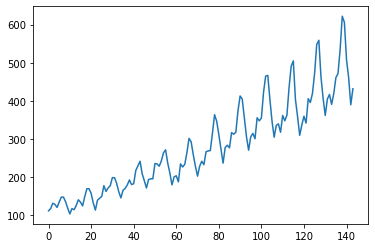

In [5]:
plt.plot(df.iloc[:,1])
plt.show()

In [6]:
data = df.iloc[:,1:2].values
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [7]:
# LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used.
sc = MinMaxScaler()
data_scaled = sc.fit_transform(data)

In [8]:
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [9]:
##splitting dataset into train and test split
training_size=int(len(data_scaled)*0.7)

In [10]:
training_size

100

In [11]:
test_size=len(data_scaled)-training_size

In [12]:
train_data,test_data=data_scaled[0:training_size,:],data_scaled[training_size:len(data_scaled),:1]

In [13]:
test_data

array([[0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train.shape, y_train.shape

((95, 4), (95,))

In [17]:
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)



In [19]:
X_train.shape

(95, 4, 1)

In [20]:
#--------------------- Building RNN/LSTM model --------------------#
#Initializing the RNN

# independent variable is a sequence of layers: regression and no classification given the continuous output value
regressor = Sequential()

In [21]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#--------------------- Compiling the RNN model --------------------#
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer =opt, loss = 'mean_squared_error')


In [22]:
#--------------------- Training RNN model --------------------#
#connecting the built regressor to the training model
regressor.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=9,batch_size=1,verbose=1)

Train on 95 samples, validate on 39 samples
Epoch 1/9
95/95 [==============================] - 5s 49ms/sample - loss: 0.0116 - val_loss: 0.0247
Epoch 2/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0079 - val_loss: 0.0190
Epoch 3/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0086 - val_loss: 0.0152
Epoch 4/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0058 - val_loss: 0.0123
Epoch 5/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0037 - val_loss: 0.0128
Epoch 6/9
95/95 [==============================] - 1s 6ms/sample - loss: 0.0043 - val_loss: 0.0200
Epoch 7/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0042 - val_loss: 0.0107
Epoch 8/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0045 - val_loss: 0.0218
Epoch 9/9
95/95 [==============================] - 1s 7ms/sample - loss: 0.0046 - val_loss: 0.0092


In [23]:
#Check for Overfitting
regressor.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

In [25]:
test_predict

array([[0.60398376],
       [0.4826966 ],
       [0.45713052],
       [0.40046918],
       [0.4933241 ],
       [0.43814093],
       [0.39395413],
       [0.5307155 ],
       [0.4255037 ],
       [0.5037022 ],
       [0.6539421 ],
       [0.67298603],
       [0.6564677 ],
       [0.43347037],
       [0.5157869 ],
       [0.39603788],
       [0.49537247],
       [0.48676023],
       [0.42287177],
       [0.61943704],
       [0.4794882 ],
       [0.6026403 ],
       [0.6803343 ],
       [0.79217505],
       [0.689106  ],
       [0.51409775],
       [0.578051  ],
       [0.47693312],
       [0.62089026],
       [0.54390347],
       [0.494177  ],
       [0.6168095 ],
       [0.6487441 ],
       [0.61817575],
       [0.8018505 ],
       [0.8809363 ],
       [0.68017226],
       [0.599365  ],
       [0.6602508 ]], dtype=float32)

In [27]:
##Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [28]:
test_predict

array([[416.8636 ],
       [354.03683],
       [340.7936 ],
       [311.44305],
       [359.5419 ],
       [330.957  ],
       [308.06824],
       [378.91064],
       [324.41092],
       [364.91776],
       [442.74203],
       [452.60678],
       [444.05026],
       [328.53766],
       [371.1776 ],
       [309.14764],
       [360.60297],
       [356.14178],
       [323.04758],
       [424.8684 ],
       [352.3749 ],
       [416.16766],
       [456.4132 ],
       [514.3467 ],
       [460.9569 ],
       [370.30264],
       [403.43042],
       [351.05136],
       [425.62115],
       [385.742  ],
       [359.9837 ],
       [423.50732],
       [440.04947],
       [424.21506],
       [519.3586 ],
       [560.325  ],
       [456.32925],
       [414.47107],
       [446.00992]], dtype=float32)

In [31]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

235.08759205182244

In [39]:
### Test Data RMSE
np.sqrt(mean_squared_error(ytest,test_predict))

400.97638360656066

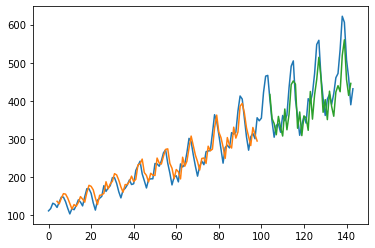

In [40]:
### Plotting 
# shift train predictions for plotting
lookback=4
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(data_scaled)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()